In [1]:
import torch
from diffusers import StableDiffusionPipeline
import os

# --- 1. Choose your model ---
# You can use a smaller, less resource-intensive model for CPU.
# 'runwayml/stable-diffusion-v1-5' is a good starting point.
# For even faster (but lower quality) results, consider models specifically
# optimized for speed like SD-Turbo or LCM models, if available in a CPU-friendly format.
model_id = "runwayml/stable-diffusion-v1-5"

# --- 2. Load the pipeline and explicitly set to CPU ---
print(f"Loading Stable Diffusion model: {model_id} to CPU...")
# 'torch_dtype=torch.float32' is often necessary for CPU as 'float16' might not be fully supported
# or optimized on all CPUs.
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32)
pipe.to("cpu")
print("Model loaded successfully to CPU.")

# --- 3. Define your prompt ---
prompt = "A majestic cat sitting on a cloud, highly detailed, fantasy art"

# --- 4. Generate the image ---
print(f"Generating image for prompt: '{prompt}'...")
# You might want to reduce the number of inference steps for faster generation
# on CPU, though it might impact quality.
num_inference_steps = 25 # Default is often 50, reducing it speeds things up
guidance_scale = 7.5 # Controls how much the prompt influences the generation

image = pipe(
    prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale
).images[0]

# --- 5. Save the image ---
output_dir = "generated_images_cpu"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "cpu_generated_image.png")
image.save(output_path)

print(f"Image saved to {output_path}")
print("Generation complete!")

2025-07-21 20:34:32.418043: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753130072.651892      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753130072.720546      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Loading Stable Diffusion model: runwayml/stable-diffusion-v1-5 to CPU...


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Model loaded successfully to CPU.
Generating image for prompt: 'A majestic cat sitting on a cloud, highly detailed, fantasy art'...


  0%|          | 0/25 [00:00<?, ?it/s]

Image saved to generated_images_cpu/cpu_generated_image.png
Generation complete!


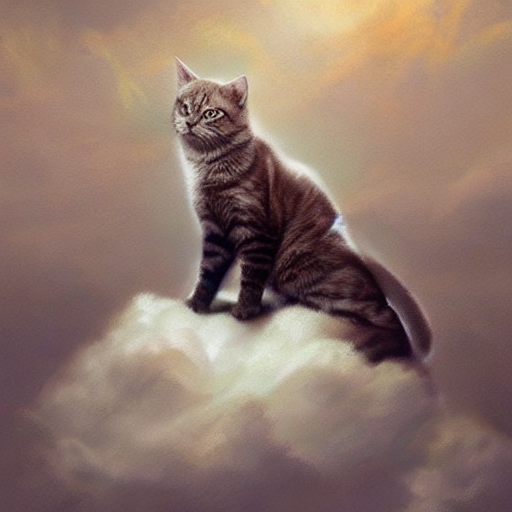

In [2]:
image

Generating image for prompt: 'An anatomically correct woman, standing, full body, hands on hips, facing the viewer, with a pleasant look on her face.'...


  0%|          | 0/25 [00:00<?, ?it/s]

Generation complete!


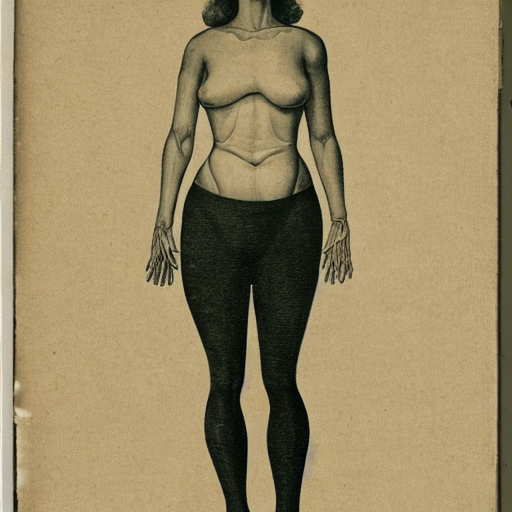

In [3]:
prompt = "An anatomically correct woman, standing, full body, hands on hips, facing the viewer, with a pleasant look on her face."

# --- 4. Generate the image ---
print(f"Generating image for prompt: '{prompt}'...")
num_inference_steps = 25
guidance_scale = 7.5 # Controls how much the prompt influences the generation

image = pipe(
    prompt,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale
).images[0]

print("Generation complete!")
image